#### Data Augmentation

Data luôn là vấn đề then chốt trong việc xây dựng mô hình Machine Learning/Deep Learning nhưng không phải lúc nào chúng ta có có một lượng data đủ lớn để train.

Vì thế việc tăng cường data (Data Augmentation) là một kỹ thuật cần biết của AI Engineer. Sau đấy tôi sẽ nói qua vài bước đơn giản và thực tế AI Engineer đang sử dụng để train model Deep Learning cho hình ảnh.

Một số kỹ thuật có thể sử dụng với Tensorflow
- Lật trái/phải
- Xoay ảnh
- Thay đổi kích cỡ
- Thay đổi Hue
- Thay đổi Độ sáng
- Thay đổi độ tương phản

Chú ý rằng cho dù ta có thay đổi hình ảnh thế nào thì nhãn vẫn giữ nguyên trong bài toán nhận diện đây là Hà Nội hay không.

In [257]:
from __future__ import absolute_import, division, print_function

from IPython.display import Image as IImage, display
import numpy as np
import PIL
from PIL import Image
import random
import requests
import tensorflow as tf

In [258]:
# Tải ảnh xuống
d = requests.get("http://media.dulich24.com.vn/diemden/ho-hoan-kiem-6487/ho-hoan-kiem.jpg")
with open("hanoi.jpg", "wb") as f:
    f.write(d.content)

In [259]:
# Đưa ảnh vào một numpy array
img = PIL.Image.open('hanoi.jpg')
img.load()
img_arr = np.array(img)

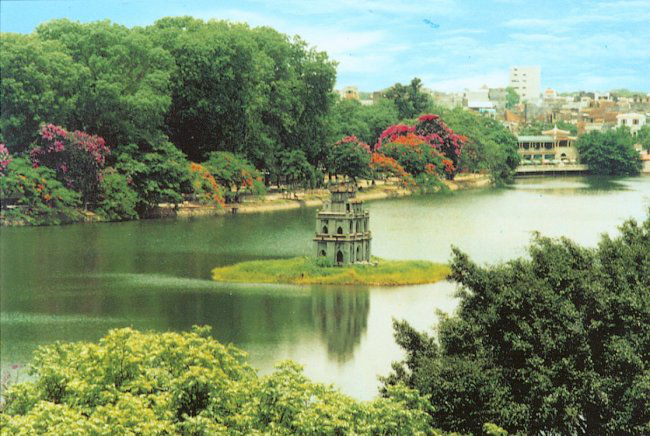

In [260]:
# Hiển thị array này bằng PIL
PIL.Image.fromarray(img_arr)

### 1. Lật ảnh

In [261]:
# Tạo một TensorFlow Session
sess = tf.Session()

In [262]:
# Lật ảnh
fliped_img_arr = tf.image.random_flip_left_right(img_arr)

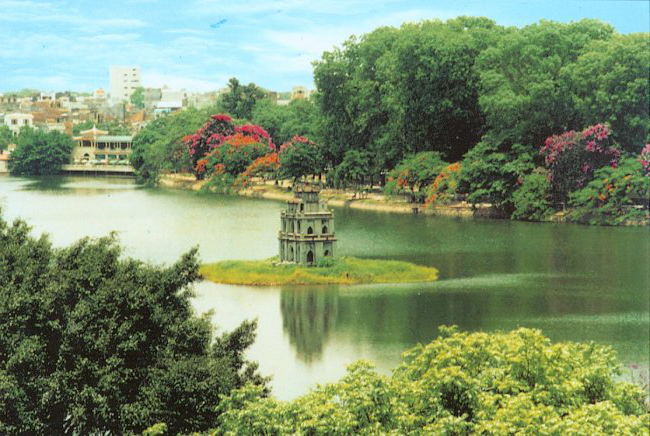

In [263]:
# Hàm Eval để lấy giá trị mảng ra khỏi Tensor
PIL.Image.fromarray(fliped_img_arr.eval(session=sess))

In [264]:
# Xoay ảnh 90 độ
rotated_90_img_arr = tf.compat.v1.image.rot90(img_arr)

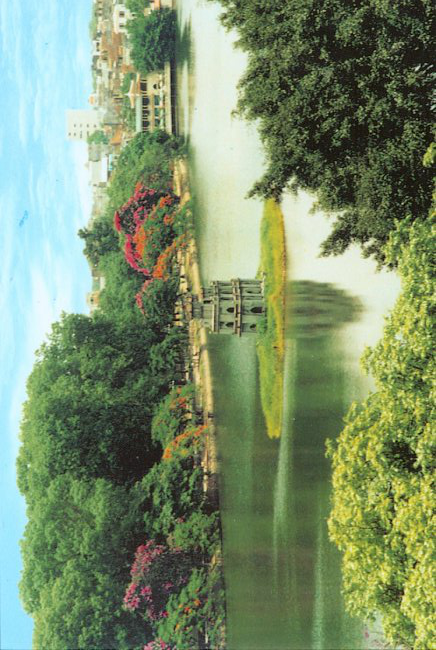

In [265]:
PIL.Image.fromarray(rotated_90_img_arr.eval(session=sess))

### 2. Thay đổi kích cỡ ảnh

In [266]:
# Giảm cỡ xuống 300 x 300
resized_img = tf.image.resize(img_arr, size=(300, 300), preserve_aspect_ratio=False)

**preserve_aspect_ratio** thể hiện là chúng ta không giữ tỉ lệ ban đầu

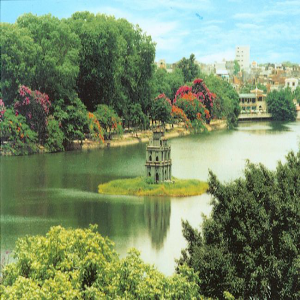

In [267]:
PIL.Image.fromarray(tf.cast(resized_img, tf.uint8).eval(session=sess))

### 3. Thay đổi Hue

In [268]:
def adjust_hue(img_arr, min_val, max_val):
    ops = tf.random.uniform((), minval=min_val, maxval=max_val)
    adjusted_hue_img = tf.image.adjust_hue(img_arr, delta=ops)
    return tf.cast(adjusted_hue_img, tf.uint8)


In [269]:
min_val = -0.1
max_val = 0.08

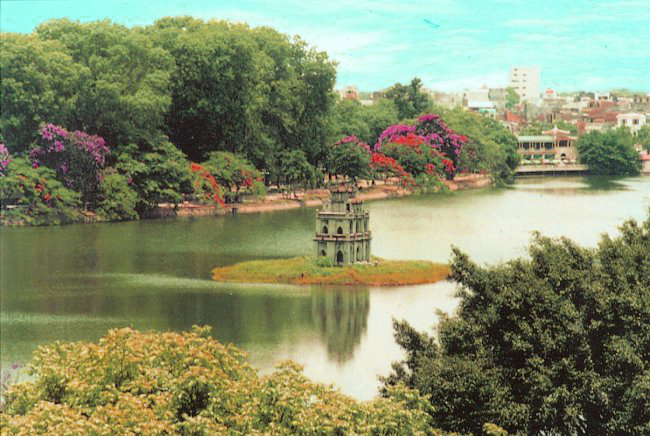

In [270]:
PIL.Image.fromarray(adjust_hue(img_arr, min_val, max_val).eval(session=session))

### 4. Thay đổi Độ sáng

In [271]:
def ajust_brightness(image, min_val, max_val):
    r = tf.random.uniform([], minval=min_val, maxval=max_val)
    image = tf.image.adjust_brightness(image, delta=r)
    return tf.cast(image, tf.uint8)

In [272]:
min_val = 0.1
max_val = 0.6

In [273]:
adjusted_brightness_img = ajust_brightness(img_arr, min_val, max_val)

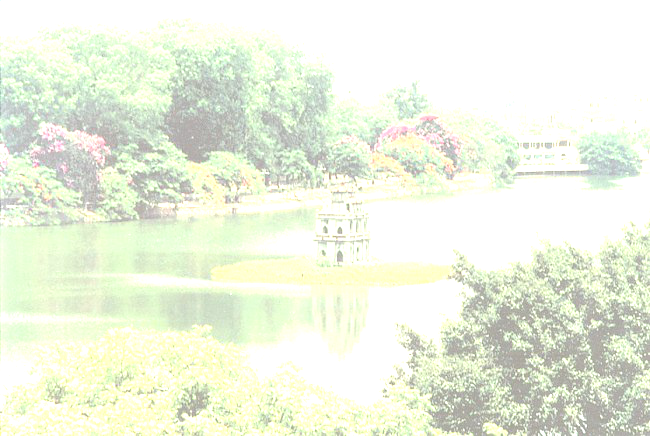

In [274]:
PIL.Image.fromarray(adjusted_brightness_img.eval(session=session))

### 5. Thay đổi Độ tương phản

In [275]:
def adjust_contrast(image, min_val, max_val):
    r = tf.random.uniform([], minval=min_val, maxval=max_val)
    image = tf.image.adjust_contrast(image, contrast_factor=r)
    return tf.cast(image, tf.uint8)

In [276]:
min_val = 0.1
max_val = 2.0

In [277]:
adjusted_contrast_img = adjust_contrast(img_arr, min_val, max_val)

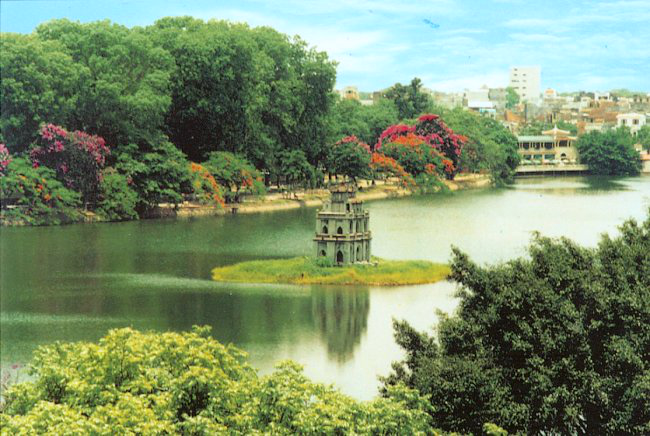

In [278]:
PIL.Image.fromarray(adjusted_contrast_img.eval(session=session))

### Cập nhật tiếp...